In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sklearn
sklearn.__version__

'1.4.2'

In [3]:
pd.options.display.max_columns = None

In [4]:
df = pd.read_csv("./cybersecurity_attacks.csv")

Aquí comienza el Análisis exploratorio del csv de la práctica, el primer punto (Preparación de datos: División train/test) se realizará más adelante. A continuación se ejecuta diverso código en cada celda para mostrar los datos contenido en el csv.

In [5]:
df.shape

(40000, 25)

In [6]:
df.dtypes

Timestamp                  object
Source IP Address          object
Destination IP Address     object
Source Port                 int64
Destination Port            int64
Protocol                   object
Packet Length               int64
Packet Type                object
Traffic Type               object
Payload Data               object
Malware Indicators         object
Anomaly Scores            float64
Alerts/Warnings            object
Attack Type                object
Attack Signature           object
Action Taken               object
Severity Level             object
User Information           object
Device Information         object
Network Segment            object
Geo-location Data          object
Proxy Information          object
Firewall Logs              object
IDS/IPS Alerts             object
Log Source                 object
dtype: object

In [7]:
df.describe(include = "all").fillna("-")

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
count,40000,40000,40000,40000.0,40000.0,40000,40000.0,40000,40000,40000,20000,40000.0,19933,40000,40000,40000,40000,40000,40000,40000,40000,20149,20039,19950,40000
unique,39997,40000,40000,-,-,3,-,2,3,40000,1,-,1,3,2,3,3,32389,32104,3,8723,20148,1,1,2
top,2022-06-11 14:28:15,103.216.15.12,84.9.164.252,-,-,ICMP,-,Control,DNS,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,-,Alert Triggered,DDoS,Known Pattern A,Blocked,Medium,Ishaan Chaudhari,Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...,Segment C,"Ghaziabad, Meghalaya",39.123.165.122,Log Data,Alert Data,Firewall
freq,2,1,1,-,-,13429,-,20237,13376,1,20000,-,19933,13428,20076,13529,13435,6,35,13408,16,2,20039,19950,20116
mean,-,-,-,32970.35645,33150.86865,-,781.452725,-,-,-,-,50.113473,-,-,-,-,-,-,-,-,-,-,-,-,-
std,-,-,-,18560.425604,18574.668842,-,416.044192,-,-,-,-,28.853598,-,-,-,-,-,-,-,-,-,-,-,-,-
min,-,-,-,1027.0,1024.0,-,64.0,-,-,-,-,0.0,-,-,-,-,-,-,-,-,-,-,-,-,-
25%,-,-,-,16850.75,17094.75,-,420.0,-,-,-,-,25.15,-,-,-,-,-,-,-,-,-,-,-,-,-
50%,-,-,-,32856.0,33004.5,-,782.0,-,-,-,-,50.345,-,-,-,-,-,-,-,-,-,-,-,-,-
75%,-,-,-,48928.25,49287.0,-,1143.0,-,-,-,-,75.03,-,-,-,-,-,-,-,-,-,-,-,-,-


In [8]:
df.head(5)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,28.67,NaN,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,IoC Detected,51.50,NaN,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,NaN,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,NaN,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


Una vez analizado el csv se procede a completar las columnas con valores en blanco (NaN). Para ello se sustituyen los datos en blanco en las columnas correspondientes con las siguientes líneas de código.

In [9]:
df['Malware Indicators'] = df['Malware Indicators'].fillna('IoC No Detected')

In [10]:
df['Alerts/Warnings'] = df['Alerts/Warnings'].fillna('No Alert Triggered')

In [11]:
df['Firewall Logs'] = df['Firewall Logs'].fillna('No Log')

In [12]:
df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].fillna('No Alert')

In [13]:
df['Proxy Information'] = df['Proxy Information'].apply(lambda x: 'Proxy' if pd.notna(x) else x)

In [14]:
df['Proxy Information'] = df['Proxy Information'].fillna('No Proxy')

Una vez completadas las columnas se procede a tratar los datos de columnas completas. Se procede a la extracción día de la semana en Timestamp, el estado en Geo-location Data y el navegador en Device Information.

In [15]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format = '%Y-%m-%d %H:%M:%S')

In [16]:
df['Timestamp'] = df['Timestamp'].dt.day_name()

In [17]:
df['Geo-location Data'] = df['Geo-location Data'].astype(str).str.split(',').str[1].str.strip()

In [18]:
df["Device Information"] = df["Device Information"].str.extract(r'^(Mozilla|Opera)')

A continuación se procede a grupar en categorias las columnas con datos númericos, con esto todos el dataframe tendría un formato uniforme.

In [19]:
df['Anomaly Scores'] = pd.cut(df['Anomaly Scores'], bins = [0, 30, 70, 100], labels = ['Low', 'Medium', 'High'], include_lowest=True)

In [20]:
df['Source Port'] = pd.cut(df['Source Port'], bins = [0, 1023, 49151, 65535], labels = ['Well-known', 'Registered', 'Dynamic'], include_lowest=True)

In [21]:
df['Destination Port'] = pd.cut(df['Destination Port'], bins = [0, 1023, 49151, 65535], labels = ['Well-known', 'Registered', 'Dynamic'], include_lowest=True)

In [22]:
df['Packet Length'] = pd.cut(df['Packet Length'], bins = [64, 256, 512, 1024, 1500], labels = ['Small', 'Medium', 'Large', 'Very Large'], include_lowest=True)

A continuación se procede a realizar la matriz de correlación de las columnas. En mi opinión, al ser un problea de clasificación con datos datos categoricos no se puede establecer una correlación entre ellos, como si la habría si fueran magnitudes (como por ejemplo el tamaño de un piso y su precio, que al aumentar una aumenta la otra). Para que el código funcione se transforman los datos categoricos en númericos, lo que en mi opinión genera correlaciones "artificiales".

In [23]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()  
encoder = LabelEncoder()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object' or df_encoded[col].dtype.name == 'category':  
        df_encoded[col] = encoder.fit_transform(df_encoded[col])  

No sé si será correcto pero he multilicado los valores por 100 para que se visualicen los colores (sin hacerlo sale todo del mismo color), pero igualmnete me remito al markdown anterior.

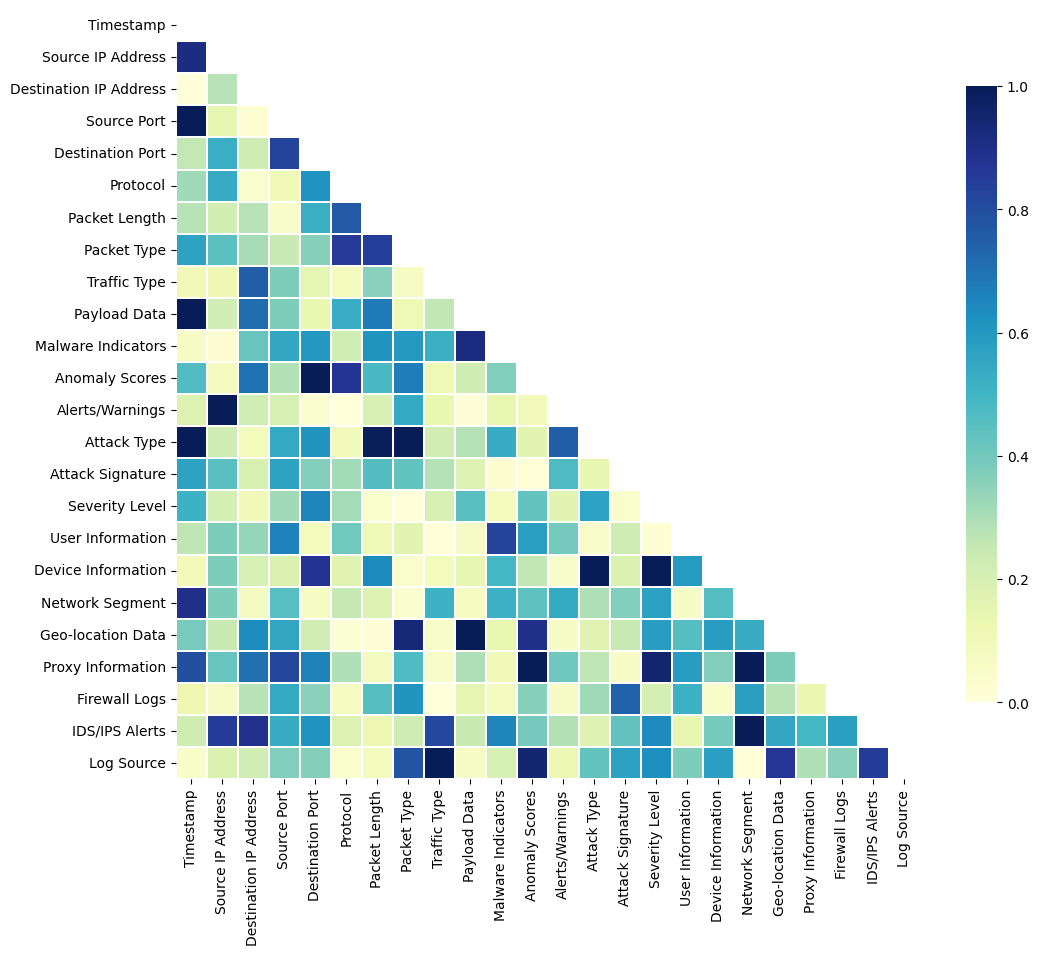

In [24]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df_encoded.drop(['Action Taken'], axis=1).corr())*100

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Se incia la fase de preprocesamiento. Se procede a eliminar datos sin utilidad siguiendo criterios lógicos. Las 2 columnas de ips tienen 40.000 valores únicos cada una una que no se pueden agrupar, con lo cual no tienen utilidad, Payload Data contiene el texto Loren Ipsum y User Information contiene 32.389 valores únicos y el que mas se repite aparece 6 veces, creo que no aporta nada tampoco.

In [25]:
df = df.drop(columns=['Destination IP Address'])

In [26]:
df = df.drop(columns=['Source IP Address'])

In [27]:
df = df.drop(columns=['Payload Data'])

In [28]:
df = df.drop(columns=['User Information'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Timestamp           40000 non-null  object  
 1   Source Port         40000 non-null  category
 2   Destination Port    40000 non-null  category
 3   Protocol            40000 non-null  object  
 4   Packet Length       40000 non-null  category
 5   Packet Type         40000 non-null  object  
 6   Traffic Type        40000 non-null  object  
 7   Malware Indicators  40000 non-null  object  
 8   Anomaly Scores      40000 non-null  category
 9   Alerts/Warnings     40000 non-null  object  
 10  Attack Type         40000 non-null  object  
 11  Attack Signature    40000 non-null  object  
 12  Action Taken        40000 non-null  object  
 13  Severity Level      40000 non-null  object  
 14  Device Information  40000 non-null  object  
 15  Network Segment     40000 non-null  

A continuación con las gráficas de cada columna con la función value counts podemos observar si los datos de las columnas están balancedos, se observa que la mayoría de las columnas lo están.

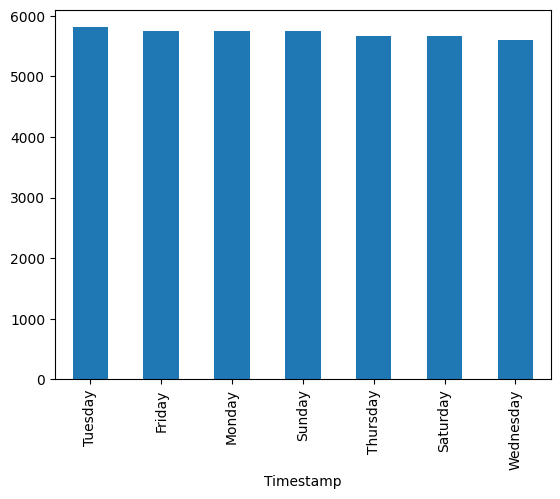

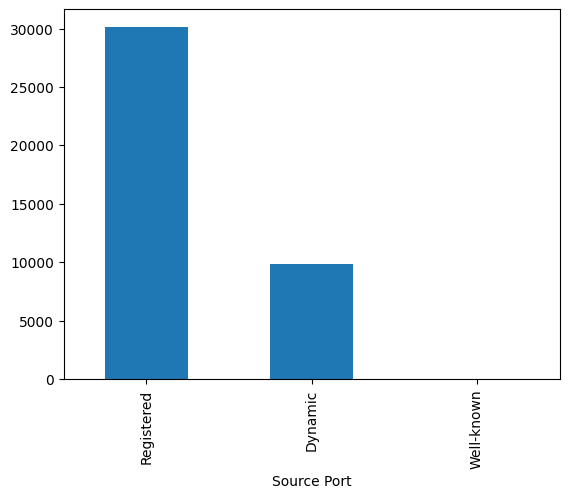

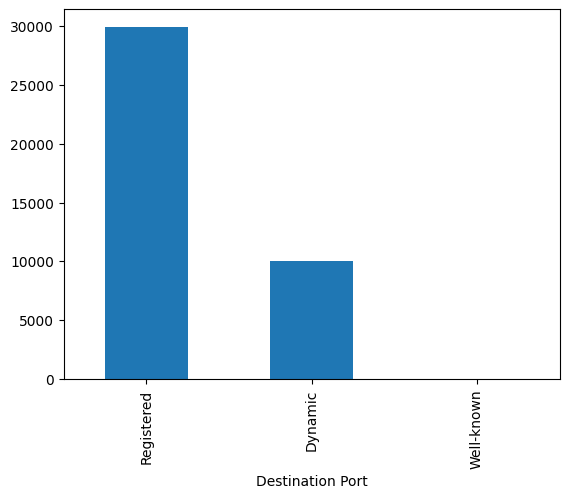

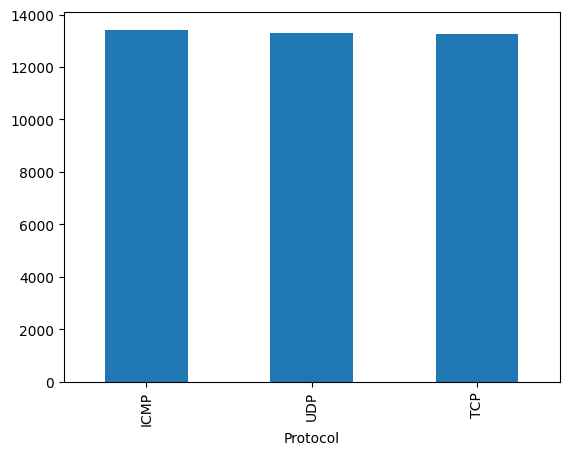

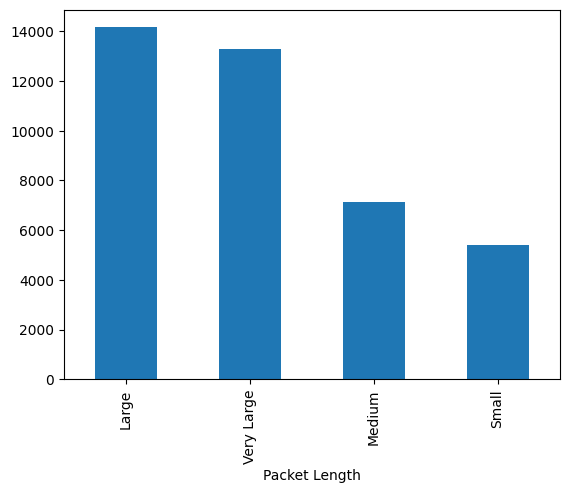

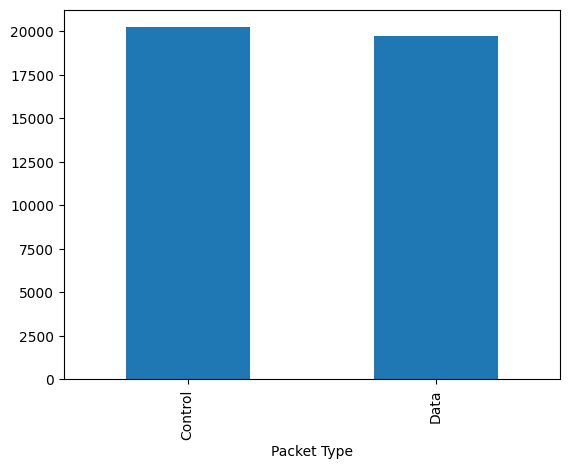

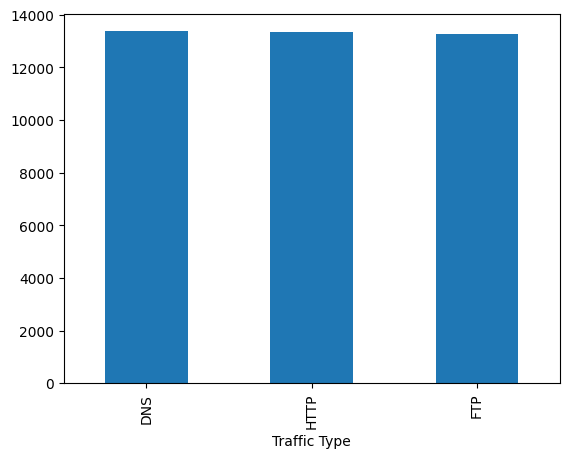

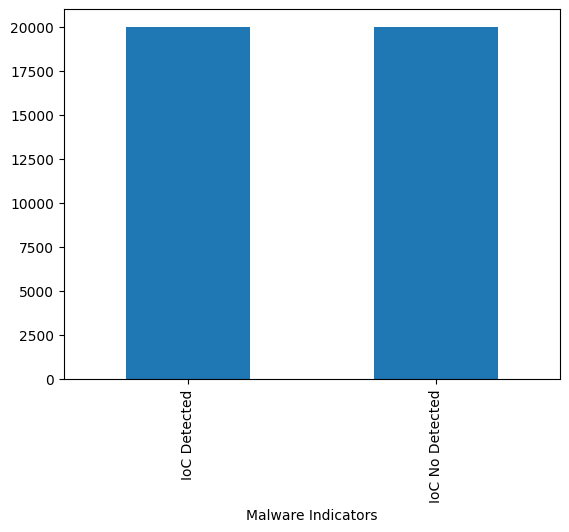

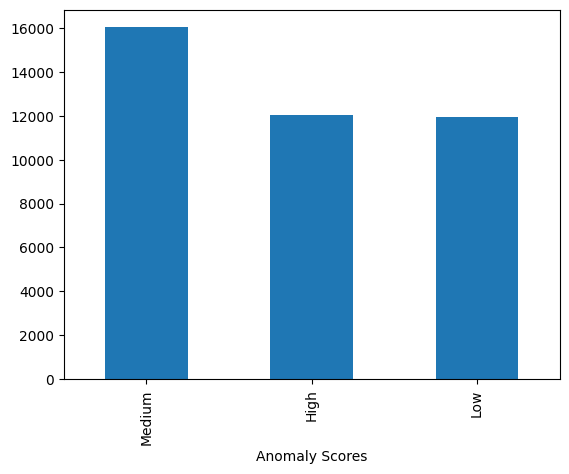

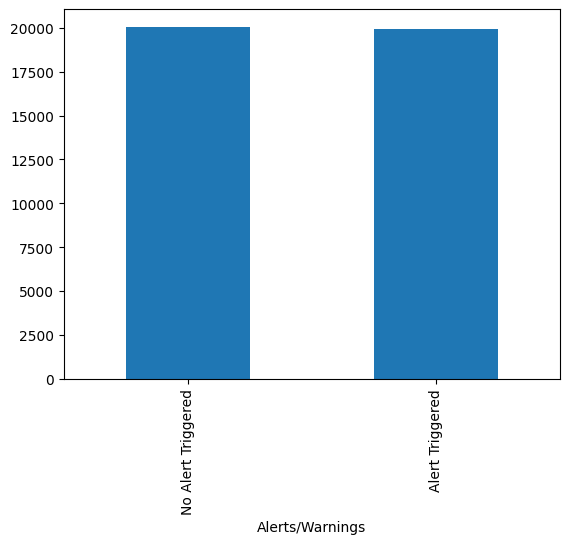

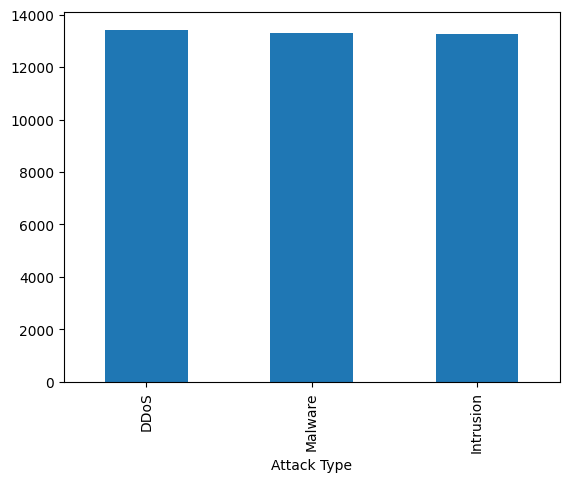

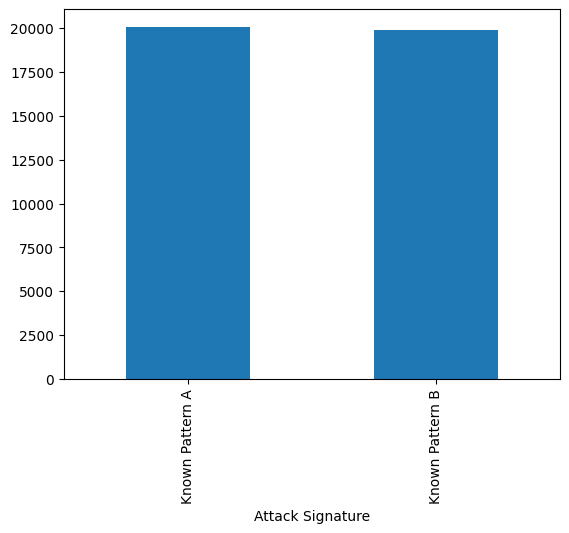

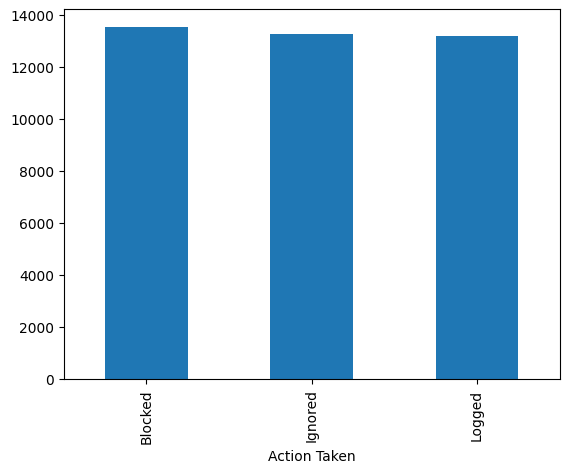

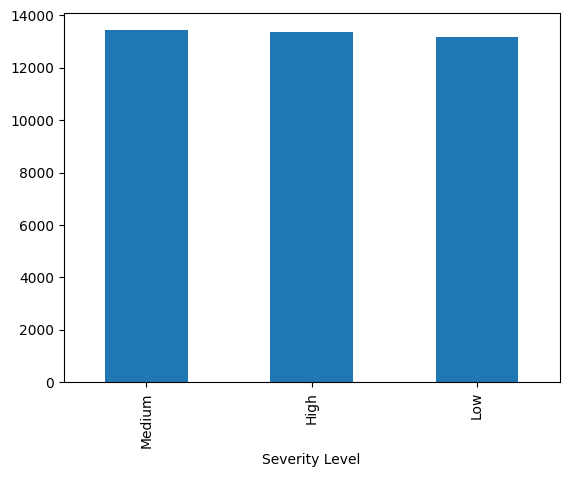

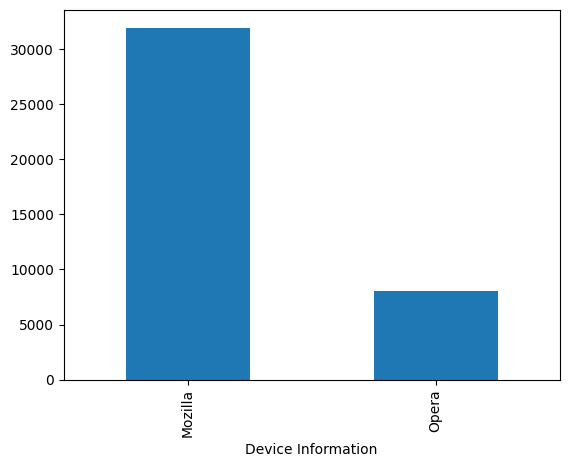

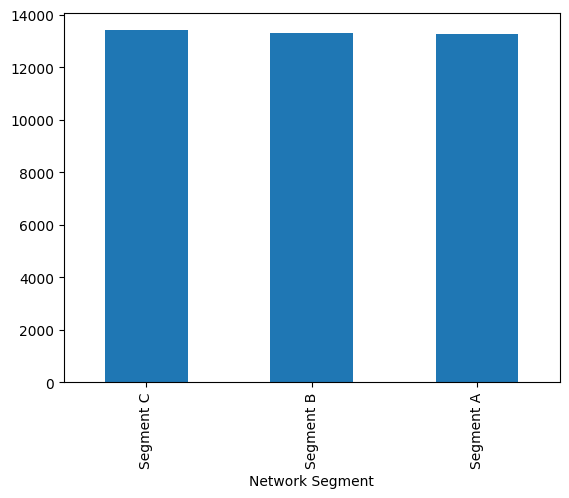

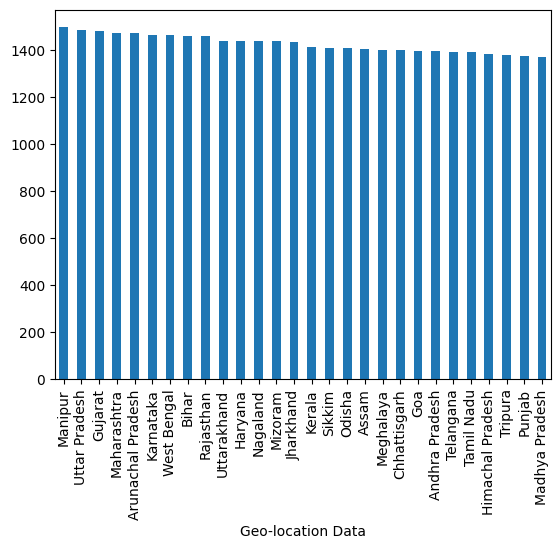

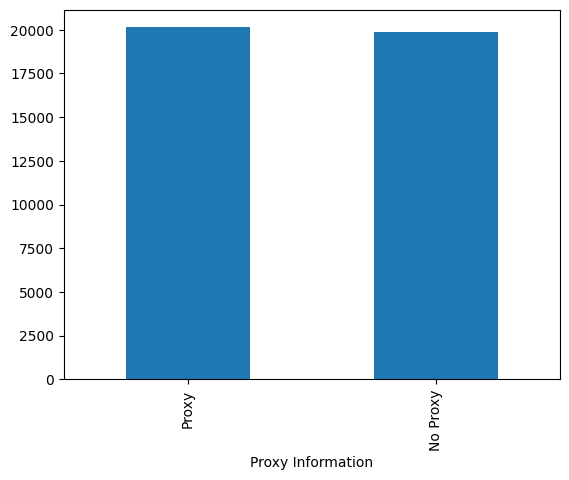

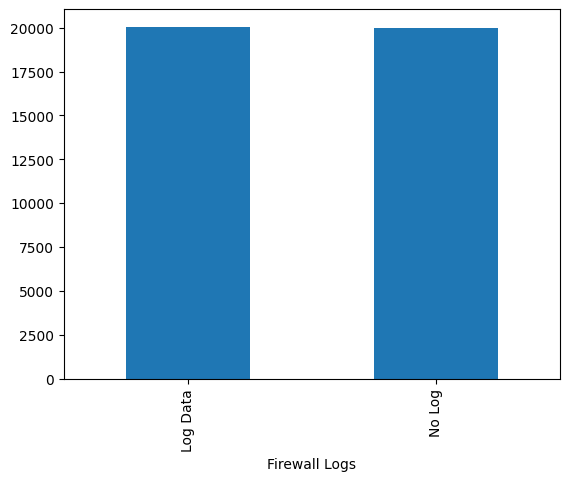

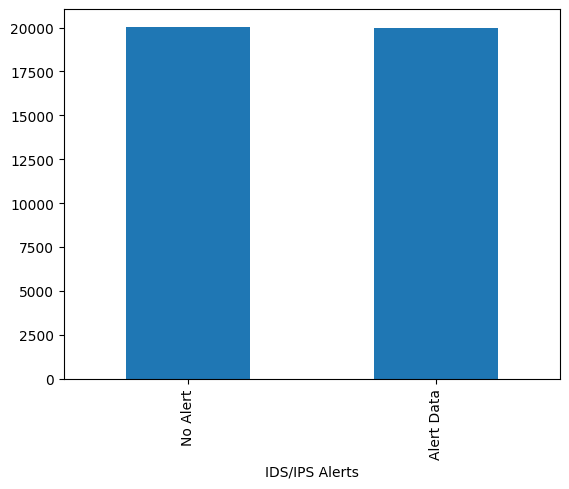

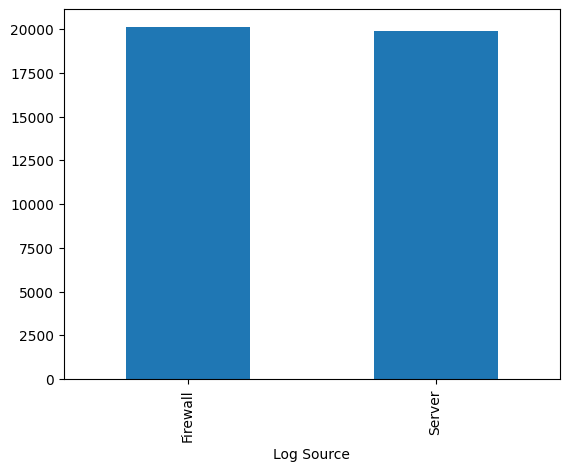

In [30]:
for c in df.columns:
    df[c].value_counts().plot.bar()
    plt.show()

Ahora se preocede a generar una copia de la variable df con la que se había trabajado hasta ahora y asignarla a la variable df_model, para proceder a preparar los datos de train y test.

In [31]:
df_model = df.copy()

In [32]:
df_model = df_model.astype({col: 'category' for col in df.select_dtypes(include='object')})

In [33]:
X=df_model.drop(columns=['Action Taken'])
y=df_model['Action Taken']

In [34]:
X = X.apply(lambda col: col.cat.codes if col.dtype.name == 'category' else col)
y = y.cat.codes

Este código que aparace a continuación es una alternativa a la conversión realizada en la anterior celda, lo vi en uno de tus notebooks, el caso es que al aplicarlo X_trains en ligar de tener 20 columnas pasa a tener 61 (el número lo digo de memoria pero creo que son 61), genera una "columna" por cada categoria contenida en las 20 columnas (es la única manera que se me ocurre de explicarlo, al hacer el X_train.shape salia 32000,61) con lo cual creo que que no es apropiado para este caso.

In [ ]:
#X = pd.get_dummies(X, drop_first=True)

#from sklearn.preprocessing import LabelEncoder

#encoder = LabelEncoder()
#y = encoder.fit_transform(y)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [36]:
X_train.shape, y_train.shape

((32000, 20), (32000,))

In [37]:
X_test.shape, y_test.shape

((8000, 20), (8000,))

Se procede a ejecutar random forest para obtener la gráfica con la importancia de las columnas

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

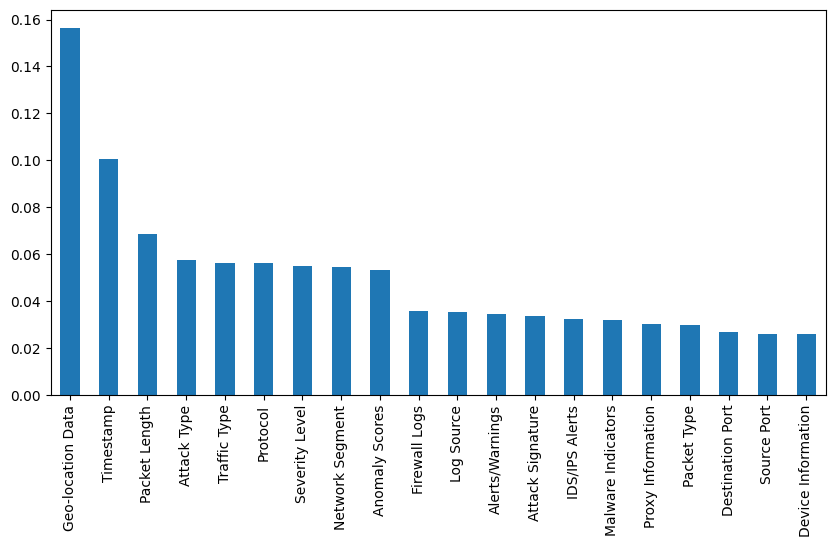

In [40]:
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False).plot(kind="bar", figsize=(10,5))
plt.show()

A partir de aquí se van a plantear 3 escenarios: volver hacer Random Forest con Cross Validation 3 veces, una sin eleminar ninguna columna, otra eliminando las que tienen valores altos en la gráfica anterior (de Geo-localitation a Anomaly Score) y otra con las columnas de valores bajos (Firewall Logs a Device Information) y se compararán los resultados.

OPCIÓN CON TODAS LAS COLUMNAS

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV] END ........................................max_depth=1; total time=   0.4s
[CV] END ........................................max_depth=1; total time=   0.4s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.5s
[CV] END ........................................max_depth=1; total time=   0.4s
[CV] END ........................................max_depth=1; total time=   0.5s
[CV] END ........................................max_depth=1; total time=   0.4s
[CV] END ........................................max_depth=2; total time=   0.4s
[CV] END .....................................

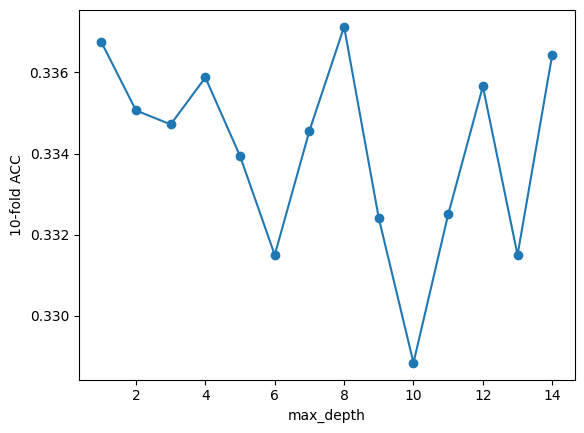

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# grid search
maxDepth   = range(1,15)
param_grid = {'max_depth': maxDepth}

# ... código aquí
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv = 10, verbose=2)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

OPCIÓN CON COLUMNAS DE VALORES ALTOS

In [42]:
Xb = X.copy()

In [43]:
Xb = Xb.drop(columns=['Firewall Logs'])

In [44]:
Xb = Xb.drop(columns=['Log Source'])

In [45]:
Xb = Xb.drop(columns=['Alerts/Warnings'])

In [46]:
Xb = Xb.drop(columns=['Attack Signature'])

In [47]:
Xb = Xb.drop(columns=['IDS/IPS Alerts'])

In [48]:
Xb = Xb.drop(columns=['Malware Indicators'])

In [49]:
Xb = Xb.drop(columns=['Proxy Information'])

In [50]:
Xb = Xb.drop(columns=['Packet Type'])

In [51]:
Xb = Xb.drop(columns=['Destination Port'])

In [52]:
Xb = Xb.drop(columns=['Source Port'])

In [53]:
Xb = Xb.drop(columns=['Device Information'])

In [54]:
yb = y.copy()

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xb, yb, test_size=0.2, shuffle=True, random_state=42)

In [56]:
X_train.shape, y_train.shape

((32000, 9), (32000,))

In [57]:
X_test.shape, y_test.shape

((8000, 9), (8000,))

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.4s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END .....................................

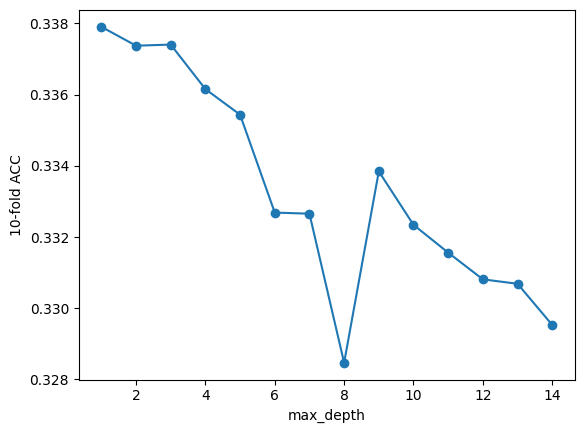

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# grid search
maxDepth   = range(1,15)
param_grid = {'max_depth': maxDepth}

# ... código aquí
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv = 10, verbose=2)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [59]:
Xc = X.copy()

In [60]:
Xc = Xc.drop(columns=['Geo-location Data'])

In [61]:
Xc = Xc.drop(columns=['Timestamp'])

In [62]:
Xc = Xc.drop(columns=['Packet Length'])

In [63]:
Xc = Xc.drop(columns=['Attack Type'])

In [64]:
Xc = Xc.drop(columns=['Traffic Type'])

In [65]:
Xc = Xc.drop(columns=['Protocol'])

In [66]:
Xc = Xc.drop(columns=['Severity Level'])

In [67]:
Xc = Xc.drop(columns=['Network Segment'])

In [68]:
Xc = Xc.drop(columns=['Anomaly Scores'])

In [69]:
yc = y.copy()

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xc, yc, test_size=0.2, shuffle=True, random_state=42)

In [71]:
X_train.shape, y_train.shape

((32000, 11), (32000,))

In [72]:
X_test.shape, y_test.shape

((8000, 11), (8000,))

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END .....................................

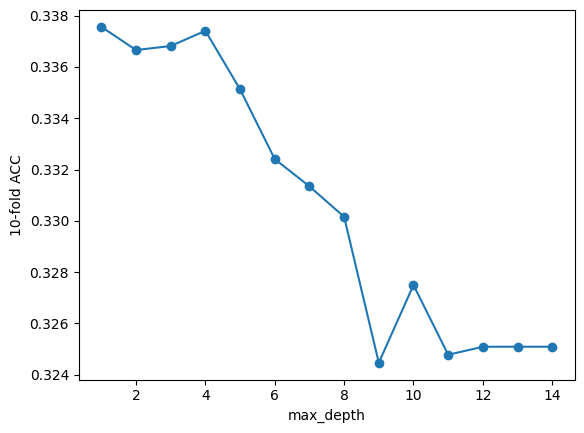

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# grid search
maxDepth   = range(1,15)
param_grid = {'max_depth': maxDepth}

# ... código aquí
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv = 10, verbose=2)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

CONCLUSIONES:

Tras hacer random forest con cross validation en los 3 escenarios, con diferentes variables y valores distintos de max_depth, se obtiene el mismo score 0.337/0.338. Esto quiere decir que el modelo no está aprendiendo correctamente, o bien es un problema de que las variables no aportan información útil al modelo (una posibilidad es que sea por errores mios en la fase de preprocesamiento) o que este modelo no es el apropiado para estas variables, habría que valorar utilizar otro modelo como xGBoost que quizá diera mejores resultados.